# PROJETO II DE C209 - LAB 1
- Aluno: Lucca Ribeiro da Silva Lopes
- Matrícula: 1949

# Resolução dos itens propostos

- Links dos vídeos pedidos:
Original   ->    https://youtube.com/shorts/8Y9C-tZfHOU?feature=share
Final      ->    https://youtube.com/shorts/sj8Njbmb4yg?feature=share

- Adicionando as bibliotecas

In [ ]:
import moviepy.editor as mpe
import numpy as np
import matplotlib.pyplot as plt


- 1) Carregando o vídeo original para o trabalho

In [2]:
# Carregar o vídeo original
video_original = mpe.VideoFileClip("video_original.mp4")


 -  2) Após isso inverter a imagem, no eixo, a cada 20 segundos

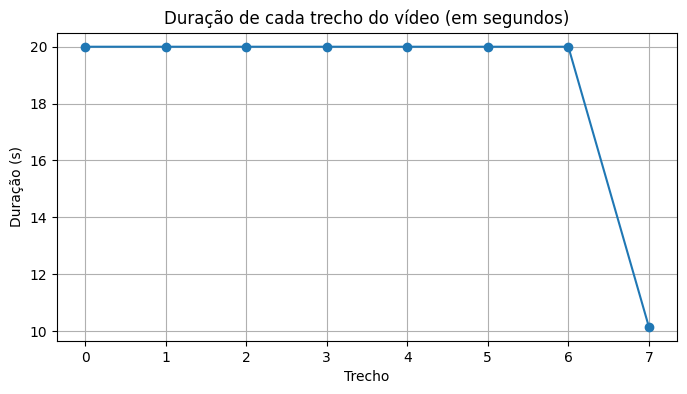



                                                                      






                                                                            
                                                                         


                                                                   



                                                      




                                                  





                                                     







                                              








                                           









                                  






chunk:   0%|          | 1/3308 [3:20:45<11064:54:25, 12045.26s/it, now=None]







































                                                                      






                                                                            
                                                                         


                          

Moviepy - Building video __temp__.mp4.
MoviePy - Writing audio in __temp__TEMP_MPY_wvf_snd.mp3










































































































































































































































                                                                      






                                                                            
                                                                         


                                                                   



                                                      




                                                  





                                                      







                                                








                                             









                                  






chunk:   0%|          | 1/3308 [3:20:47<11067:00:46, 12047.55s/it, now=None]







































                     

MoviePy - Done.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


ValueError: The duration of video __temp__.mp4 (150.2) exceeds the 'maxduration' attribute. You can increase 'maxduration', by passing 'maxduration' parameterto ipython_display function.But note that embedding large videos may take all the memory away !

In [ ]:
# Função para inverter o eixo do vídeo a cada 20 segundos
def girar(video):
    clips = []
    durations = []
    
    for i in range(0, int(video.duration), 20):
        subclip = video.subclip(i, min(i + 20, video.duration))
        durations.append(subclip.duration)  # Guardar duração de cada trecho
        if (i // 20) % 2 == 0:  # Inverte nos intervalos pares
            subclip = subclip.fx(mpe.vfx.mirror_x)
        clips.append(subclip)
    
    # Exibir durações dos trechos em gráfico
    plt.figure(figsize=(8, 4))
    plt.plot(np.arange(len(durations)), durations, marker='o')
    plt.title("Duração de cada trecho do vídeo (em segundos)")
    plt.xlabel("Trecho")
    plt.ylabel("Duração (s)")
    plt.grid()
    plt.show()
    
    return mpe.concatenate_videoclips(clips)

# Aplicar a função
video_invertido = girar(video_original)
video_invertido.write_videofile("video_invertido.mp4")


- 3) Diminiur o som, de forma gradativa, a cada 30 segundos, com silêncio nos últimos 10 segundos

In [ ]:
# Função para ajustar gradativamente o volume e silenciar os últimos 10 segundos
def ajuste_audio(video):
    clips = []
    for i in range(0, int(video.duration), 30):
        # Define os intervalos de subclips
        subclip = video.subclip(i, min(i + 30, video.duration - 10))
        duration = subclip.duration

        if subclip.audio:
            # Reduzir gradativamente o volume
            def volume_curve(t):
                if t < duration - 10:  # Durante o subclip (exceto os últimos 10 segundos)
                    return max(1 - 0.2 * (i // 30), 0)  # Reduz 20% a cada intervalo de 30 segundos
            
            # Aplicar a curva de volume ao áudio
            audio_adjusted = subclip.audio.volumex(1 - 0.2 * (i // 30)).audio_fadeout(10)
            subclip = subclip.set_audio(audio_adjusted)
        
        clips.append(subclip)
    
    # Concatenar os clipes ajustados
    return mpe.concatenate_videoclips(clips)

# Aplicar a função ao vídeo invertido
video_invert_adjaudio = ajuste_audio(video_invertido)

# Criar o subclip mudo
subclip_mudo = video_invert_adjaudio.subclip(140, video_invert_adjaudio.duration).set_audio(None)

# Concatenar o vídeo ajustado com o subclip mudo
video_full = mpe.concatenate_videoclips([video_invert_adjaudio, subclip_mudo])

# Exportar o vídeo final
video_full.write_videofile("video_full.mp4", codec="libx264", audio_codec="aac")




                                                                     






                                                                            
                                                                        


                                                                  



                                                      




                                                  





                                                    







                                              








                                           






chunk:   0%|          | 1/3308 [3:12:10<10591:41:39, 11530.12s/it, now=None]






























                                                                      






                                                                            
                                                                         


                                                                  



             

Moviepy - Building video video_full.mp4.
MoviePy - Writing audio in video_fullTEMP_MPY_wvf_snd.mp4










































































































































































































                                                                      






                                                                            
                                                                         


                                                                  



                                                      




                                                  





                                                    







                                              








                                           






chunk:   0%|          | 1/3308 [3:12:12<10593:41:34, 11532.29s/it, now=None]






























                                                                      






                                    

MoviePy - Done.
Moviepy - Writing video video_full.mp4



Moviepy - Done !
Moviepy - video ready video_full.mp4


- 4) Realizandos os cortes no vídeo e os reordenando

In [ ]:
video_part1 = video_full.subclip(0, 60)  # Primeiro minuto
video_part2 = video_full.subclip(60, 80)  # 20 segundos cortados
video_part3 = video_full.subclip(80, video_full.duration)

# Log para verificar a duração
print(f"Duração do vídeo original: {video_full.duration} segundos")
print(f"Parte 1: {video_part1.duration} segundos")
print(f"Parte 2: {video_part2.duration} segundos")

# Reorganizar   
video_reordenado = mpe.concatenate_videoclips([video_part1, video_part3, video_part2])
video_reordenado.write_videofile("video_completo_final.mp4", codec="libx264", audio_codec="aac")




                                                                      






                                                                            
                                                                         


                                                                   



                                                      




                                                  





                                                    







                                              








                                           






chunk:   0%|          | 1/3308 [3:15:38<10783:27:19, 11738.87s/it, now=None]






























                                                                      






                                                                            
                                                                         


                                                                   



         

Duração do vídeo original: 140.3 segundos
Parte 1: 60 segundos
Parte 2: 20 segundos
Moviepy - Building video video_completo_final.mp4.
MoviePy - Writing audio in video_completo_finalTEMP_MPY_wvf_snd.mp3














































































































































































































































                                                                      






                                                                            
                                                                         


                                                                   



                                                      




                                                  





                                                     







                                              








                                           






chunk:   0%|          | 1/3308 [3:15:41<10785:51:08, 11741.48s/it, now=None]






























                                                                      






MoviePy - Done.
Moviepy - Writing video video_completo_final.mp4



IndexError: list index out of range